In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Imoporting Dataset

In [3]:
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Creating features and target of dataset

In [6]:
X= np.array(df.drop('species', axis= 1))
y= df[['species']]

## Splitting data into train and test data.

In [19]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

# Creating Decision Tree with help of DecissionTreeClassifier
#### from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
d_tree= DecisionTreeClassifier()

In [11]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred= d_tree.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [13]:
y_test

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor
31,setosa
64,versicolor
141,virginica
68,versicolor
82,versicolor


# Validating predictions

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
accuracy_score(y_test, y_pred)

1.0

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# The Random Forest Classifier 
It is an advanced machine learning algorithm widely used for various classification tasks. It's essentially an ensemble method, which means it combines the predictions from multiple machine learning algorithms to make more accurate predictions than any individual model. Here’s an overview of its use and significance:

1. **How it Works**:
   - **Ensemble of Decision Trees**: Random Forest builds multiple decision trees and merges them to get a more accurate and stable prediction.
   - **Randomness**: It introduces randomness in two ways:
     - Each tree in the forest is built from a random sample of the data (bootstrapping).
     - At each node, a random subset of features is considered for splitting (feature randomness).
   - **Majority Voting (Classification)**: Each decision tree in the forest predicts the class for a given observation. The final class output is the one that receives the majority of the votes from the individual trees.

2. **Advantages**:
   - **Accuracy**: Generally more accurate than a single decision tree.
   - **Overfitting**: Less prone to overfitting than individual decision trees.
   - **Feature Importance**: It can handle a large dataset with higher dimensionality and can estimate which variables are important in the classification.
   - **Versatility**: Effective for both classification and regression tasks and works well with both categorical and continuous values.
   - **Handles Missing Values**: Can handle missing data by maintaining accuracy even if a bulk of the data is missing.

3. **Disadvantages**:
   - **Complexity**: More complex and computationally intensive than individual decision trees.
   - **Interpretability**: Less interpretable than a single decision tree - you lose the simple decision path.
   - **Performance**: For very large datasets, the size of the trees can lead to slow real-time predictions.

4. **Applications**:
   - **Finance**: For credit scoring and predicting stock market trends.
   - **Healthcare**: For medical diagnosis and predicting disease outbreaks.
   - **E-commerce**: For customer segmentation, recommendation systems, and fraud detection.
   - **Remote Sensing**: For land cover and land use classification.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
r_cls= RandomForestClassifier(n_estimators= 1000, random_state= 42, n_jobs= 8)

### n_estimators= 1000
- It shows the no of decision trees.
### n_jobs=8: 
This parameter specifies the number of jobs to run in parallel for both fitting and predicting. If set to -1, it means using all processors. Here, it's set to 8, which means eight processors are used in parallel. This can speed up the training process, especially when dealing with large datasets.

In [42]:
r_cls.fit(X_train, y_train)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000, n_jobs=8, random_state=42)

In [43]:
y_pred= r_cls.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [44]:
y_test

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor
31,setosa
64,versicolor
141,virginica
68,versicolor
82,versicolor


### Checking validity of results

In [45]:
accuracy_score(y_test, y_pred)

1.0

## Features importance in decision tree making

In [49]:
r_cls.feature_importances_

array([0.1051965 , 0.03242519, 0.43951174, 0.42286656])

### Sepal length
Low importance but more than sepal width
### Sepal width
Lowest importance among all features
### Petal length
Higher importance among all features
### Petal width
Higher importance but lower than Petal length

# The Gradient Boosting Classifier 
It is a powerful machine learning technique that's part of a class of algorithms known as ensemble methods. Specifically, it's a type of boosting algorithm, which works by sequentially adding predictors to an ensemble, each one correcting its predecessor. Here’s a detailed overview of its use and significance:

1. **How it Works**:
   - **Sequential Learning**: Unlike Random Forests, which build trees in parallel, Gradient Boosting builds one tree at a time. Each new tree helps to correct errors made by the previously trained tree.
   - **Gradient Descent**: It uses gradient descent to minimize the loss when adding new models. This involves calculating the negative gradient of the loss function, which guides the model to make more accurate predictions.

2. **Advantages**:
   - **High Performance**: Often provides high predictive accuracy.
   - **Flexibility**: Can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.
   - **Handling Different Types of Data**: Effective with heterogeneous features (numeric, categorical) and different scales of measurement.

3. **Disadvantages**:
   - **Computational Intensity**: More computationally expensive than Random Forest. Training generally takes longer because trees are built sequentially.
   - **Overfitting Risk**: Prone to overfitting, especially with noisy data or if the number of trees is too large.
   - **Less Interpretability**: More complex than Decision Trees or Random Forest, making it harder to interpret.



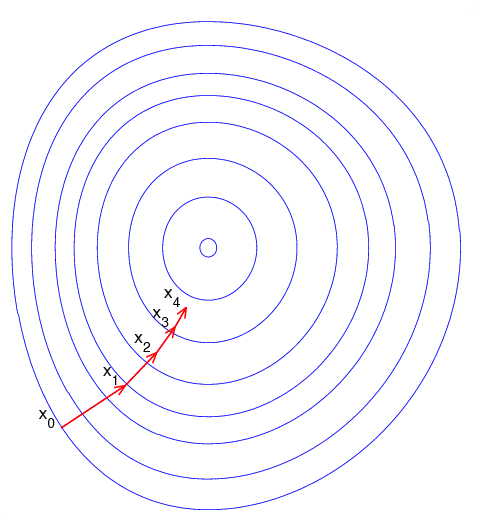

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gr_boost= GradientBoostingClassifier()

In [52]:
gr_boost.fit(X_train, y_train)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [53]:
y_pred= gr_boost.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [54]:
y_test

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor
31,setosa
64,versicolor
141,virginica
68,versicolor
82,versicolor


In [55]:
accuracy_score(y_test,y_pred)

1.0

# The Gradient Boosting Regressor
It is a machine learning technique used for regression tasks, where the goal is to predict a continuous value (like house prices, temperatures, or sales figures). It's a type of ensemble learning method, more specifically, a boosting method. Here's an overview of its use and significance:

1. **How it Works**:
   - **Ensemble of Weak Learners**: Gradient Boosting combines multiple weak learning models, typically decision trees, to create a strong predictive model. 
   - **Sequential Training**: Each new model is trained to correct the errors made by the previous ones in a sequential manner.
   - **Gradient Descent Approach**: It uses a gradient descent algorithm to minimize the loss (difference between predicted and actual values). The algorithm determines the direction in which the next model will aim to reduce errors.

2. **Advantages**:
   - **High Accuracy**: Often provides high predictive accuracy for a wide range of regression problems.
   - **Flexibility**: It can optimize different loss functions and can be tuned through various hyperparameters.
   - **Handles Various Data Types**: Effective with heterogeneous features (numeric, categorical).

3. **Disadvantages**:
   - **Computationally Intensive**: Training can be slow, as trees are built sequentially.
   - **Overfitting Risk**: If not properly tuned, it can overfit to the training data, especially with noisy datasets.
   - **Complexity**: More complex and less interpretable than simpler models like linear regression.

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Importing diabetes dataset from sklearn

In [59]:
from sklearn.datasets import load_diabetes

In [61]:
df= load_diabetes()

In [63]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## Defining features of dataset

In [65]:
X= df.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

## Defining target of dataset

In [70]:
y= df.target

In [71]:
X.shape

(442, 10)

In [72]:
y.shape

(442,)

## Spliting data into test and train

In [73]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [74]:
gr_br_reg= GradientBoostingRegressor()

In [75]:
gr_br_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [76]:
y_pred= gr_br_reg.predict(X_test)
y_pred

array([161.28890402, 191.88852889, 163.66379665, 286.77408706,
       126.49996592, 138.79547463, 253.80291171, 222.7045274 ,
       166.56078892, 155.64221091,  99.00733449, 198.29749658,
        97.58573764, 225.401141  , 115.1540594 , 133.35092035,
       235.84498939, 252.91414377, 168.96173466, 231.43143199,
       192.35140539,  95.62484163,  67.54198254, 202.2972312 ,
       159.53403047, 183.7925768 , 195.3200868 , 179.47572829,
        71.15936531, 108.37068485, 170.07419058, 128.78259432,
       147.42247059, 188.10588472, 150.42127293, 193.22024796,
       111.42671823, 118.66001789, 184.57829795,  67.167402  ,
        63.06461029,  81.27471725, 172.59588967, 198.64947627,
       176.02862907,  79.77418456, 114.0814497 , 116.85106502,
        83.27173248, 170.25102398, 129.91636865,  79.17912235,
       148.04542475, 102.73086241, 195.19948233, 147.5767223 ,
       102.43547652, 237.35568497,  94.67990241,  86.56337633,
       177.9989703 , 183.73615687, 139.67408135,  87.03

In [77]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

### Checking validaty of prediction

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
mean_absolute_error(y_test, y_pred)

44.482126409949224

In [81]:
mse= mean_squared_error(y_test, y_pred)
mse

2901.349610721569

In [82]:
msre= np.sqrt(mse)
msre

53.86417743474386

In [83]:
r2_score(y_test, y_pred)

0.452384577030301

# XGBoost (eXtreme Gradient Boosting) 
It is an advanced implementation of gradient boosting algorithm, known for its efficiency, flexibility, and portability. It has gained popularity in machine learning competitions and practical applications. Here's an overview of its use and significance:

1. **How it Works**:
   - **Gradient Boosting Framework**: XGBoost is based on the gradient boosting framework, which means it builds trees one at a time, where each new tree helps to correct errors made by the previous one.
   - **Regularization**: It includes built-in regularization (both L1 and L2), which helps to prevent overfitting and improves model performance.

2. **Performance and Scalability**:
   - **Speed and Efficiency**: XGBoost is designed to be highly efficient, scalable, and fast. It can handle large datasets and scales well to multiple cores.
   - **Cross-platform**: It works across platforms and provides interfaces for multiple programming languages, including Python, R, Julia, Java, and Scala.

3. **Advantages**:
   - **Highly Flexible**: Allows users to define custom optimization objectives and criteria.
   - **Handling Missing Values**: Automatically handles missing values.
   - **Built-in Cross-Validation**: Allows users to run a cross-validation at each iteration of the boosting process.

4. **Applications**:
   - Widely used in various fields such as finance, healthcare, and e-commerce for tasks like risk modeling, predictive analytics, and customer behavior analysis.

In [84]:
import xgboost as xgb

In [86]:
xgb= xgb.XGBRegressor( objective="reg:linear")

In [87]:
xgb.fit(X_train, y_train)

C:\Users\abdul\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:02:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [89]:
y_pred= xgb.predict(X_test)
y_pred

array([183.55995 , 196.34492 , 140.23865 , 251.6438  , 155.95978 ,
       116.03    , 232.68831 , 230.6592  , 160.93066 , 155.44531 ,
       101.55508 , 182.03644 ,  96.29003 , 248.01443 ,  57.859074,
       109.910385, 234.6656  , 269.2864  , 225.98083 , 223.71652 ,
       142.93085 , 129.36087 ,  81.01341 , 183.42865 , 140.90508 ,
       161.83163 , 254.8143  , 190.84981 ,  54.446354, 152.48701 ,
       189.46696 , 124.937035, 164.10951 , 165.19907 , 143.31764 ,
       187.91249 ,  96.76458 , 104.86573 , 176.95404 ,  65.58786 ,
        65.8214  ,  81.16961 , 226.71605 , 177.86528 , 170.22581 ,
        75.42741 ,  74.26628 , 122.41351 ,  76.6424  , 173.11517 ,
        87.59428 ,  61.997677, 153.01071 , 110.88335 , 192.7184  ,
       121.21806 , 108.784035, 227.78516 ,  93.37904 ,  62.866592,
       195.42165 , 181.01393 , 116.14964 , 108.79567 , 140.05815 ,
       257.10352 , 164.21645 , 204.84991 , 198.5902  , 127.16396 ,
       165.55936 , 224.9902  , 195.8609  ,  85.94691 ,  64.542

In [90]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

## Validating accuracy

In [91]:
mae= mean_absolute_error(y_test, y_pred)
mae

46.38896564955122

In [92]:
mse= mean_squared_error(y_test, y_pred)
mse

3351.001637862091

In [93]:
msre= np.sqrt(mse)
msre

57.88783670048563

In [94]:
r2_score(y_test, y_pred)

0.3675149756138415